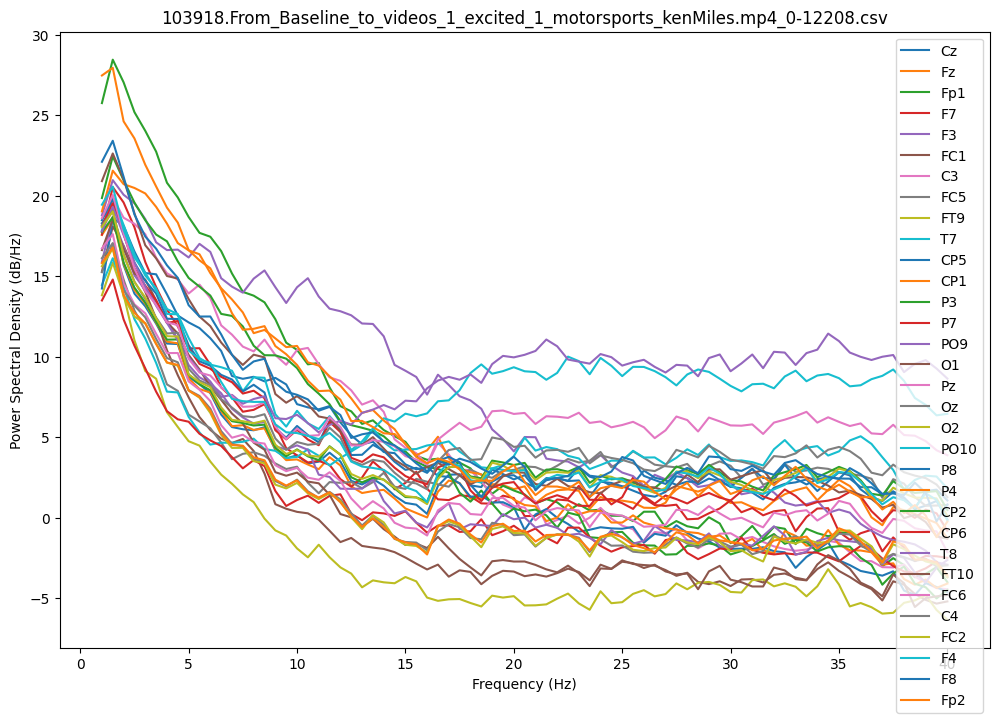

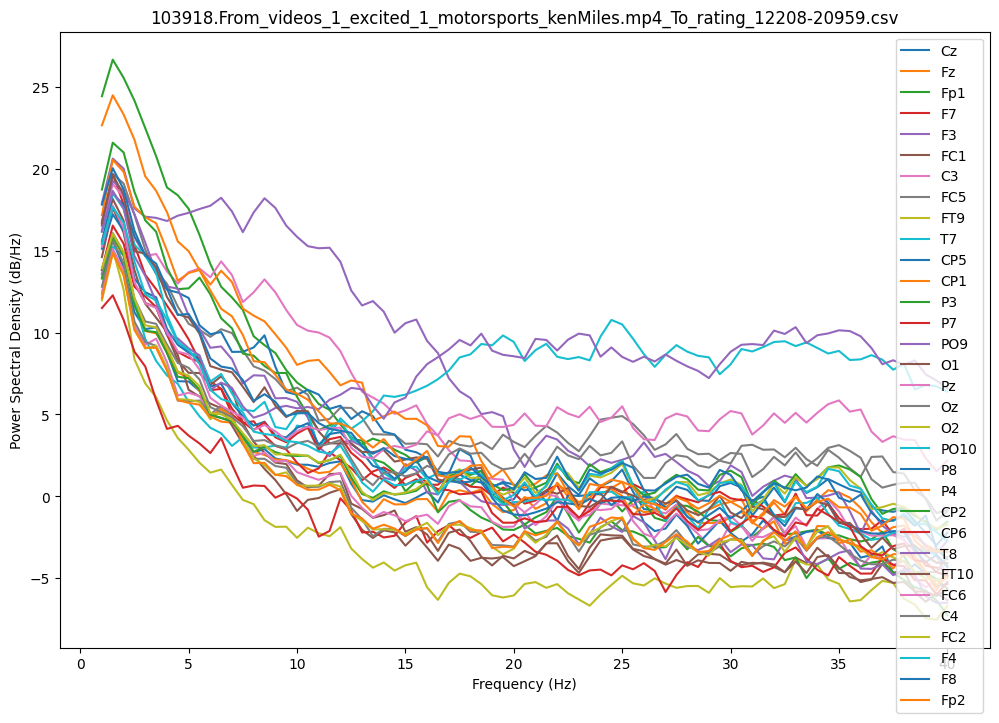

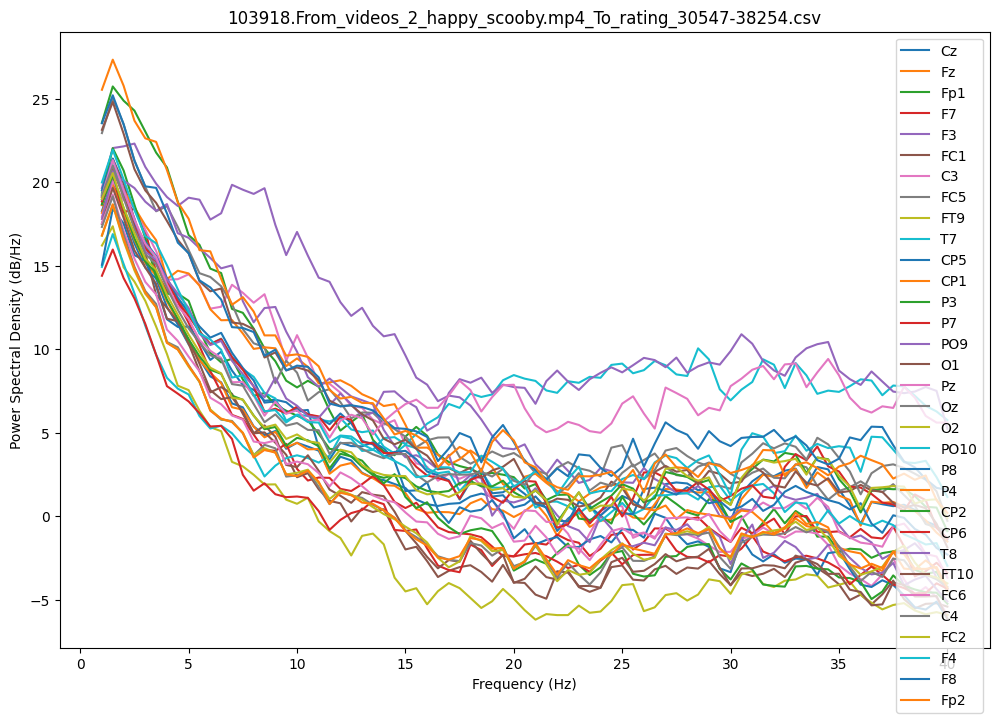

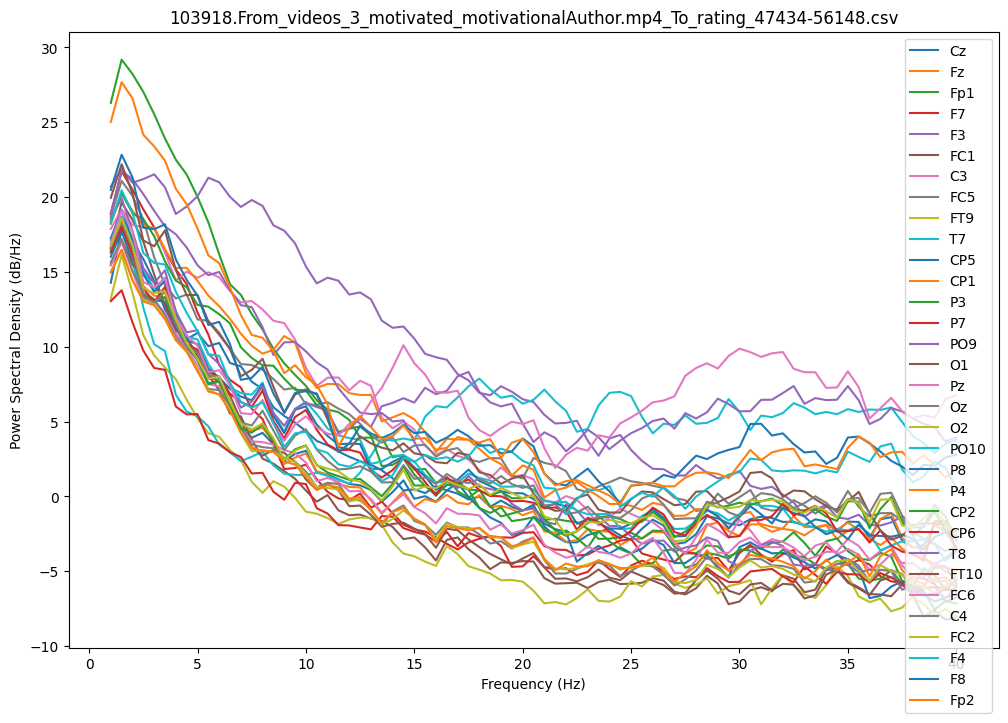

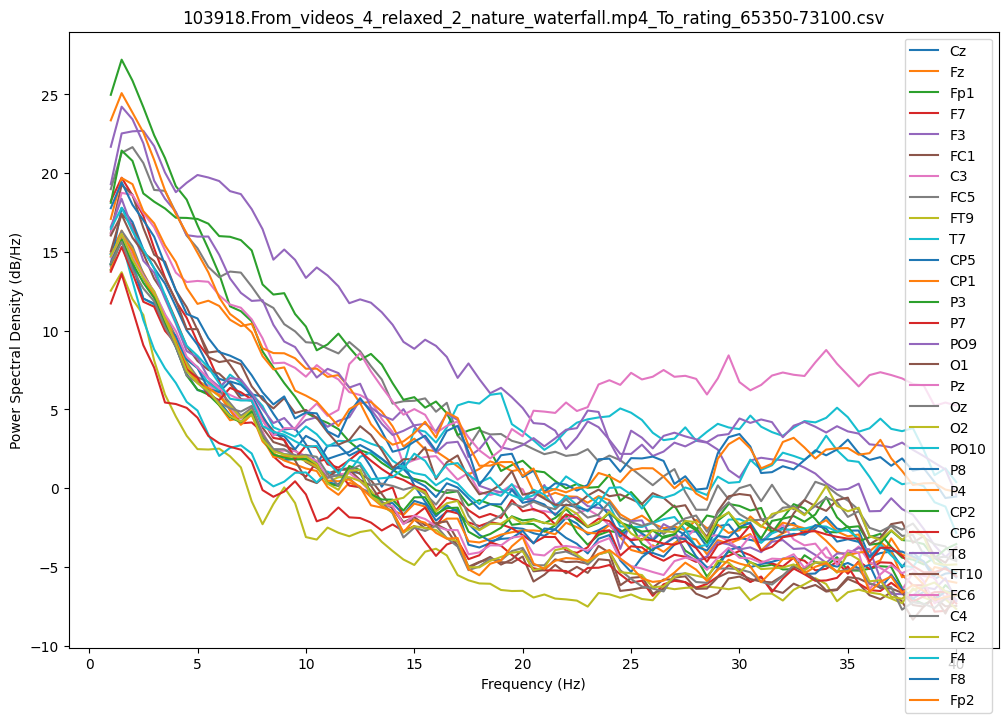

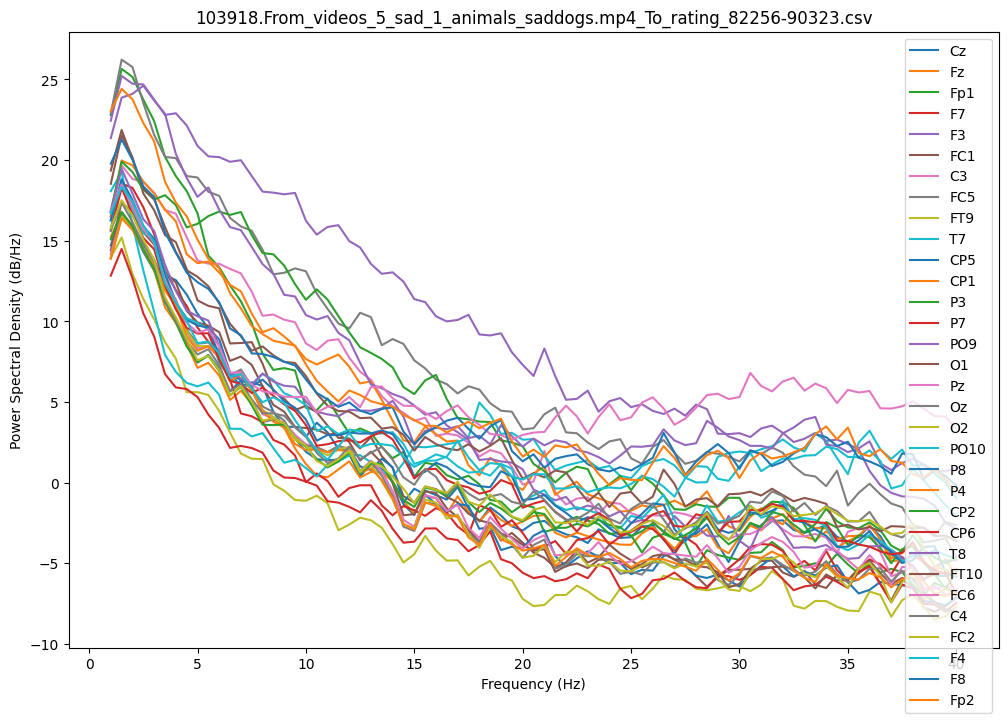

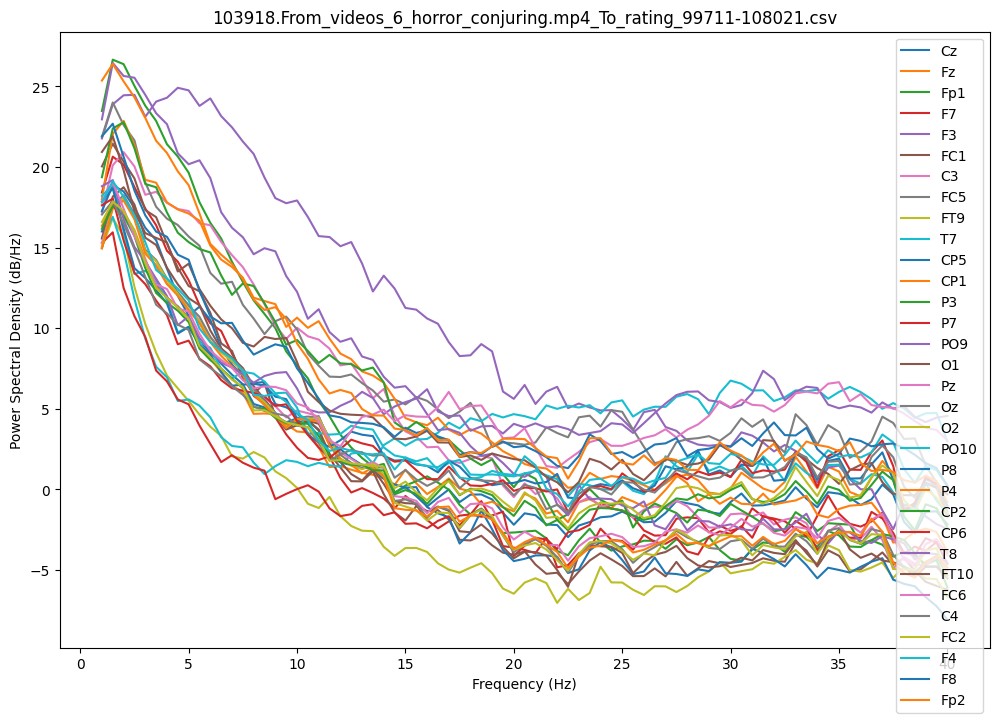

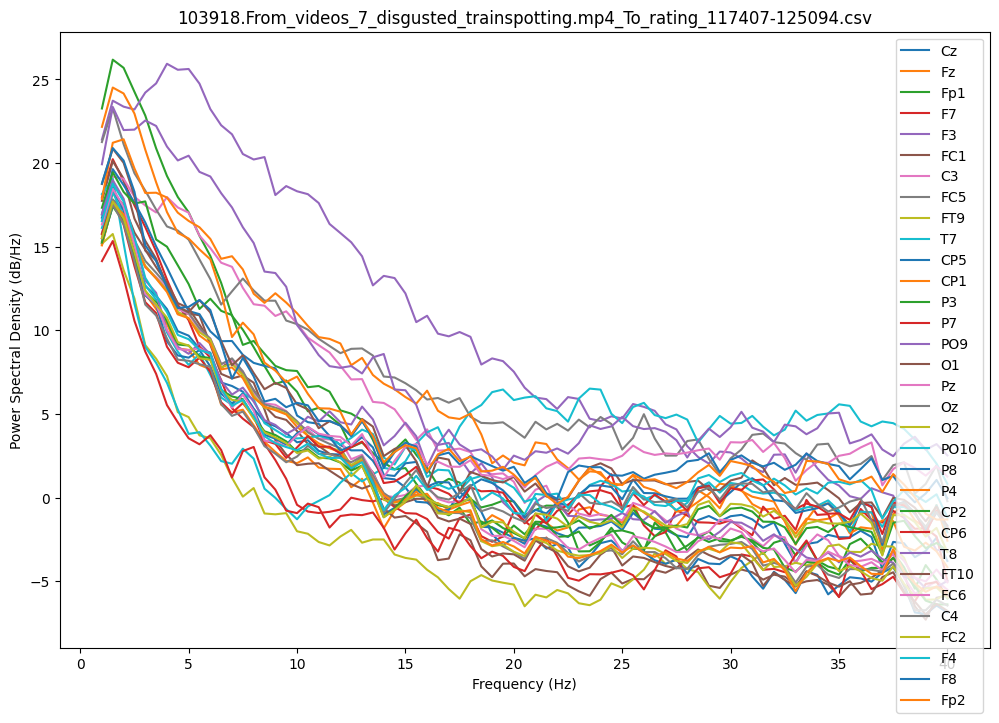

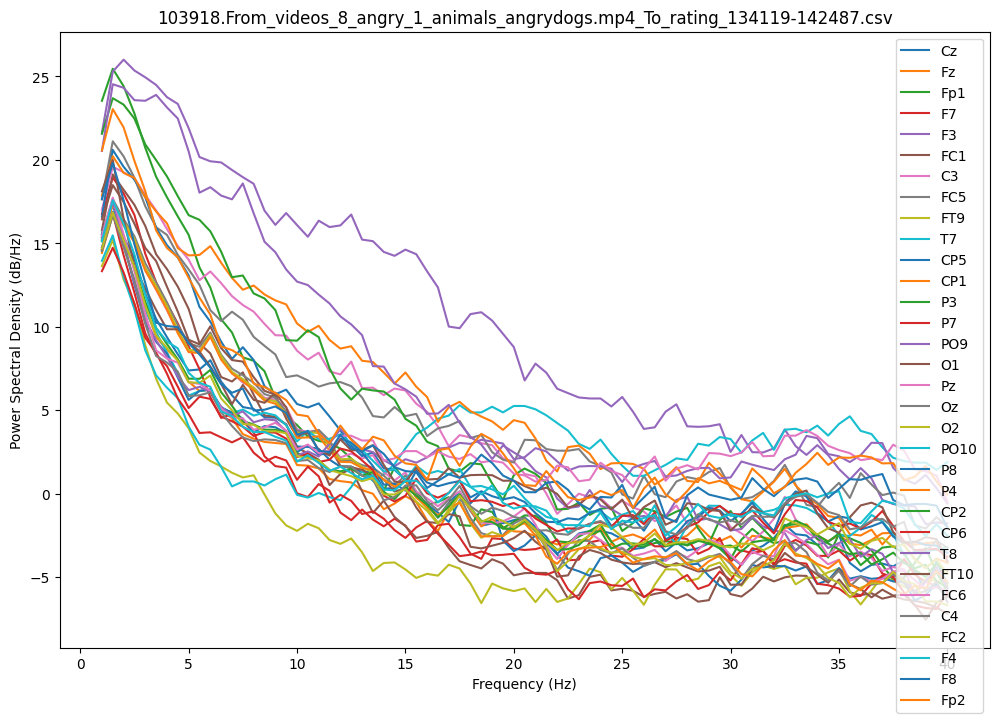

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.signal import welch, butter, filtfilt

folder = r"T:\GITHUB\DATA_ANALYSIS_TOOLS\103918\split" # Specify your directories.
working_output = "output folder"
os.chdir(folder)

def read_csv(file_path):
    df = pd.read_csv(file_path, usecols=range(4, 36), header=0, skiprows=[0])
    return df

def highpass_filter(data, cutoff=1.0, fs=128, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y
    

def compute_psd(data, sampling_rate=128):
    psd_dict = {}
    for column in data.columns:
        filtered_data = highpass_filter(data[column], cutoff=1.0, fs=sampling_rate, order=5)
        frequency, powervalues = welch(filtered_data, fs=sampling_rate, nperseg=256) # nperseg can be adjusted for resolution.
        psd_dict[column] = (frequency, powervalues)
    return psd_dict

def plot_psd(psd_dict, freq_range, file_name, output_path):
    plt.figure(figsize=(12, 8))
    for label, (freqs, psd) in psd_dict.items():
        mask = (freqs >= freq_range[0]) & (freqs <= freq_range[1])
        freqs, psd = freqs[mask], psd[mask]
        plt.plot(freqs, 10 * np.log10(psd), label=label[4:]) 
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title(file_name)
    plt.legend()
    plt.show()
    # plt.savefig(output_path) # For saving plots. This will create folders and files.
    # plt.close()

for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            data = read_csv(file_path)
            psd_dict = compute_psd(data)

            relative_path = os.path.relpath(root, folder)
            output_directory = os.path.join(working_output, relative_path)
            os.makedirs(output_directory, exist_ok=True)
            output_file_path = os.path.join(output_directory, file.replace('.csv', '.png'))
            plot_psd(psd_dict, freq_range=(1, 40), file_name=file, output_path=output_file_path)
